In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
from google.colab import drive
from google.colab import files
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import quantile_transform

In [2]:
import torch
import torch.nn as nn

In [3]:
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
DF = pd.read_csv('/content/drive/MyDrive/Proyecto8/DataFrames /DataFinal.csv', index_col= False)

In [5]:
DF = DF.drop(columns='Unnamed: 0')

In [6]:
DF

,Multiband_period,GP_DRW_tau_r,GP_DRW_sigma_g,GP_DRW_tau_g,Amplitude_r,IAR_phi_r,Amplitude_g,Autocor_length_g,Gskew_g,Meanvariance_g,PercentAmplitude_g,Q31_g,Std_g,ExcessVar_g,SF_ML_amplitude_g,SF_ML_gamma_g,IAR_phi_g,classALeRCE
0,15.780730,4.808991,0.245956,5.251873,0.576968,0.821701,0.748833,2.0,0.571878,0.033938,0.076212,1.005811,0.524465,0.001149,0.675791,-0.035507,8.204546e-01,CEP
1,11.927180,2.248160,0.126136,2.937845,0.362886,0.672017,0.556808,1.0,0.156255,0.026167,0.047838,0.670627,0.373529,0.000683,0.510957,0.011341,7.331026e-01,CEP
2,30.995104,6.378780,0.132610,10.612898,0.452118,0.856191,0.645168,3.0,0.229613,0.027025,0.060667,0.743516,0.407151,0.000729,0.550771,-0.031368,9.271285e-01,CEP
3,1.849328,0.578738,0.140541,0.070337,0.414722,0.187589,0.569841,1.0,-0.504367,0.022026,0.049284,0.686710,0.376544,0.000481,0.501414,-0.016520,3.724786e-13,CEP
4,1.287263,2.205629,0.231433,0.375745,0.611173,0.641274,0.739046,1.0,-1.083969,0.025622,0.068012,0.382981,0.483527,0.000624,0.629238,-0.033390,8.618697e-02,CEP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2984,0.361031,0.202896,0.010084,1.733148,0.074460,0.000007,0.155351,1.0,-0.143085,0.006362,0.014535,0.083317,0.101311,0.000039,0.218273,0.228236,4.980988e-01,RRL
2985,1.289885,4.685241,0.123093,0.173668,0.341293,0.814153,0.546029,1.0,-0.696444,0.021799,0.054982,0.380784,0.351267,0.000474,0.763895,0.176183,2.717854e-06,RRL
2986,0.572462,0.178392,0.056905,1.343321,0.256259,0.000008,0.298072,1.0,0.420554,0.014354,0.030565,0.380155,0.240704,0.000204,0.166045,-0.283681,4.827859e-01,RRL
2987,0.097275,36.807612,0.241035,5.299086,0.468070,0.971783,0.629217,1.0,0.000477,0.029123,0.037500,0.921388,0.488585,0.000845,15.000000,1.393247,7.731402e-01,RRL


In [7]:
#Separamos la data para realizar oversampling y luego normalización
features = ["Multiband_period","GP_DRW_tau_g","IAR_phi_g","Amplitude_g","ExcessVar_g",
            "Meanvariance_g","Std_g","GP_DRW_sigma_g","GP_DRW_tau_r","PercentAmplitude_g",
            "SF_ML_amplitude_g","Gskew_g","Q31_g", "Autocor_length_g","IAR_phi_r",
            "SF_ML_gamma_g","Amplitude_r"]

X = DF.loc[:, features] #se define la data correspondiente las características
Y = DF.loc[:, ['classALeRCE']] #se define la data correspondiente a las clases, que corresponde a el target

In [8]:
smt = SMOTE()
x_sm, y_sm = smt.fit_resample(X,Y)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(x_sm, y_sm, random_state=1, train_size = .75)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(2457, 17)
(2457, 1)
(819, 17)
(819, 1)


In [10]:
X_train

,Multiband_period,GP_DRW_tau_g,IAR_phi_g,Amplitude_g,ExcessVar_g,Meanvariance_g,Std_g,GP_DRW_sigma_g,GP_DRW_tau_r,PercentAmplitude_g,SF_ML_amplitude_g,Gskew_g,Q31_g,Autocor_length_g,IAR_phi_r,SF_ML_gamma_g,Amplitude_r
3043,0.807947,0.200644,8.472191e-06,0.313208,0.000234,0.015131,0.218481,0.048509,1.489875,0.024557,0.347537,0.043096,0.383098,1.0,5.937029e-01,0.100983,0.226987
866,0.130164,3.635448,7.505883e-01,0.259190,0.000157,0.012557,0.191898,0.036269,0.813775,0.028026,0.250029,-0.309199,0.367830,1.0,2.950913e-01,-0.025491,0.214247
1398,0.249626,0.073022,8.695865e-06,0.341825,0.000172,0.013151,0.209030,0.045330,0.032473,0.038726,0.326980,0.455596,0.116417,1.0,4.230063e-13,0.066034,0.272401
1552,275.362316,411.733127,9.975411e-01,2.938936,0.001173,0.096410,1.884744,2.734584,564.606615,0.219654,2.941454,0.278793,3.554033,12.0,1.687637e-01,0.289732,1.790577
2612,0.619761,2.131696,6.282359e-01,0.462071,0.000349,0.018731,0.295318,0.087224,0.133455,0.049291,0.446006,-0.601356,0.397525,1.0,2.769535e-06,0.027085,0.302788
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2763,0.491999,0.334858,6.476254e-02,0.675664,0.000821,0.028765,0.488072,0.229250,4.661224,0.074760,0.646404,-1.130893,0.947553,1.0,8.164875e-01,-0.012482,0.491038
905,0.069247,0.066703,4.155224e-13,0.195215,0.000063,0.008017,0.123540,0.016046,0.047637,0.019777,0.193504,-0.214521,0.083137,1.0,3.588872e-13,0.015454,0.120385
1096,0.150365,0.008168,5.466109e-13,0.261264,0.000110,0.010570,0.181267,0.032155,0.512768,0.017737,0.257545,-0.080475,0.343429,1.0,1.477018e-01,-0.008836,0.238719
235,31.879192,8.139701,8.822309e-01,0.512377,0.000295,0.017258,0.279775,0.082698,10.959976,0.038385,0.379811,-0.118458,0.306443,1.0,9.190763e-01,-0.043332,0.409689


In [11]:
y_train

,classALeRCE
3043,CEP
866,DSCT
1398,E
1552,LPV
2612,RRL
...,...
2763,RRL
905,DSCT
1096,E
235,CEP


In [12]:
X_train_qtn = quantile_transform(X_train, n_quantiles=100, output_distribution="normal", random_state=0, copy=True)
X_test_qtn = quantile_transform(X_test, n_quantiles=100, output_distribution= "normal", random_state=0, copy=True)

In [13]:
X_train_qtn

array([[ 0.1712383 , -0.50915737, -0.72693948, ...,  0.27151561,
         0.4280171 , -0.19101954],
       [-0.8892245 ,  0.53751708,  0.49950323, ...,  0.02832934,
        -0.81718411, -0.31472107],
       [-0.40747904, -1.07476007, -0.72001892, ..., -5.19933758,
         0.25366364,  0.12856757],
       ...,
       [-0.73331175, -1.95457909, -5.19933758, ..., -0.11141897,
        -0.57476601, -0.09084323],
       [ 1.04813532,  0.73666403,  0.74099572, ...,  0.78507852,
        -1.00374618,  0.77799965],
       [-0.41436367,  0.0633156 ,  0.06225605, ...,  0.03914386,
        -0.8841015 , -0.76478045]])

#Autoencoder

In [15]:
pip install keras-tuner --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 135 kB 5.2 MB/s 
     |████████████████████████████████| 1.6 MB 37.4 MB/s 


In [16]:
#para el autoencoder
import math
import tensorflow as tf
import keras_tuner.tuners as kt
from tensorflow.keras import Model
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.losses import MeanSquaredLogarithmicError
from keras.layers import Input, Dense
from keras.models import Model, Sequential
from keras import regularizers

In [17]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.manifold import TSNE

In [ ]:
class Autoencoder(nn.Module):
  super().__init__()
  
  def __init__(self):
    self.encoder = nn.Sequential(
        nn.Linear(entrada,18),
        nn.ReLU(),
        nn.Linear(18,9),
        nn.ReLU(),
        nn.Linear(9,4),
        nn.ReLU(),
        nn.Linear(4,2),
    )

    self.decoder = nn.Sequential(
        nn.Linear(2,4),
        nn.ReLU(),
        nn.Linear(4,9),
        nn.ReLU(),
        nn.Linear(9,18),
        nn.ReLU(),
        nn.Linear(18,entrada),
        nn.Tanh()
    )

    def forward(self,x):
      encoded = self.encoder(x)
      decoded = self.decoder(encoded)
      return decoded

RuntimeError: ignored

In [ ]:
model = Autoencoder()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3, weight_decay = 1e-5)

In [21]:
class AutoEncoders(Model):

  def __init__(self, output_units):

    super().__init__()
    self.encoder = Sequential(
        [
          Dense(18, activation="tanh"),
          Dense(9, activation="tanh"),
          Dense(4, activation="tanh"),
          Dense(2, activation="tanh")
        ]
    )

    self.decoder = Sequential(
        [
          Dense(4, activation="tanh"),
          Dense(9, activation="tanh"),
          Dense(18, activation="tanh"),
          Dense(output_units, activation="tanh")
        ]
    )

def call(self, inputs):

  encoded = self.encoder(inputs)
  decoded = self.decoder(encoded)
  return decoded
  
auto_encoder = AutoEncoders(len(X_train_qtn))

auto_encoder.compile(
    loss='mae',
    metrics=['mae'],
    optimizer='adam'
)

history = auto_encoder.fit(
    X_train_qtn, 
    X_train_qtn, 
    epochs=15, 
    batch_size=32, 
    validation_data=(X_test_qtn, X_test_qtn)
)

Epoch 1/15


NotImplementedError: ignored

In [18]:
input_layer = Input(shape =(X.shape[1], ))

encoded = Dense(18, activation ='tanh')(input_layer)
encoded = Dense(9, activation ='tanh')(encoded)
encoded = Dense(4, activation ='tanh')(encoded)
encoded = Dense(2, activation ='tanh')(encoded)
  
# Building the Decoder network
decoded = Dense(4, activation ='tanh')(encoded)
decoded = Dense(9, activation ='tanh')(decoded)
decoded = Dense(18, activation ='tanh')(decoded)
  
# Building the Output Layer
output_layer = Dense(X.shape[1], activation ='tanh')(decoded)

In [19]:
# Defining the parameters of the Auto-encoder network
autoencoder = Model(input_layer, output_layer)
autoencoder.compile(optimizer ="adam", loss ="mae")
  
# Training the Auto-encoder network
autoencoder.fit(X_train_qtn, X_train_qtn, 
                batch_size = 10, epochs = 50, 
                shuffle = True, validation_split = 0.20)

Epoch 1/50
197/197 [==============================] - 3s 9ms/step - loss: 0.8819 - val_loss: 0.7703
Epoch 2/50
197/197 [==============================] - 1s 5ms/step - loss: 0.7141 - val_loss: 0.7115
Epoch 3/50
197/197 [==============================] - 1s 5ms/step - loss: 0.6833 - val_loss: 0.6978
Epoch 4/50
197/197 [==============================] - 1s 6ms/step - loss: 0.6738 - val_loss: 0.6923
Epoch 5/50
197/197 [==============================] - 1s 4ms/step - loss: 0.6670 - val_loss: 0.6868
Epoch 6/50
197/197 [==============================] - 1s 5ms/step - loss: 0.6645 - val_loss: 0.6843
Epoch 7/50
197/197 [==============================] - 1s 6ms/step - loss: 0.6609 - val_loss: 0.6823
Epoch 8/50
197/197 [==============================] - 1s 5ms/step - loss: 0.6592 - val_loss: 0.6818
Epoch 9/50
197/197 [==============================] - 1s 7ms/step - loss: 0.6576 - val_loss: 0.6808
Epoch 10/50
197/197 [==============================] - 1s 7ms/step - loss: 0.6570 - val_loss: 0.6800

In [24]:
encoder_layer = auto_encoder.get_layer('sequential')
reduced_df = pd.DataFrame(encoder_layer.predict(X_train_qtn))
reduced_df = reduced_df.add_prefix('feature_')
reduced_df #se obtiene un dataset de 2457/3617 desordenadas?????

77/77 [==============================] - 0s 3ms/step


,feature_0,feature_1
0,-0.138597,0.668255
1,-0.088517,-0.036072
2,0.421745,0.306382
3,0.458969,-0.604105
4,0.167067,0.073323
...,...,...
2452,0.030908,0.009077
2453,-0.440217,0.890523
2454,-0.402458,0.883388
2455,0.405743,0.161445


In [25]:
u = y_train.reset_index(drop=True)
u

,classALeRCE
0,CEP
1,DSCT
2,E
3,LPV
4,RRL
...,...
2452,RRL
2453,DSCT
2454,E
2455,CEP


In [26]:
!pip install mlpack3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement mlpack3 (from versions: none)
ERROR: No matching distribution found for mlpack3


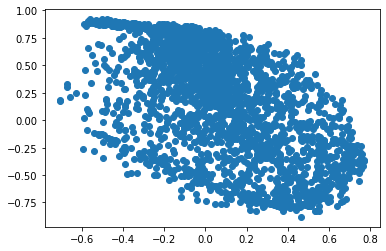

In [27]:
plt.scatter(reduced_df['feature_0'],reduced_df['feature_1'])

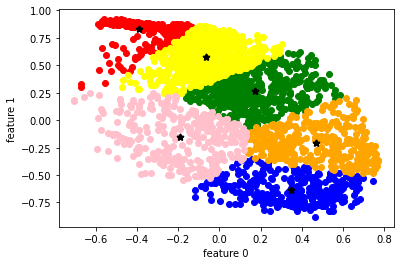

In [28]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=6)
prediction = km.fit_predict(reduced_df[['feature_0','feature_1']])
reduced_df['cluster'] = prediction
a = reduced_df[reduced_df.cluster==0]
b = reduced_df[reduced_df.cluster==1]
c = reduced_df[reduced_df.cluster==2]
d = reduced_df[reduced_df.cluster==3]
e = reduced_df[reduced_df.cluster==4]
f = reduced_df[reduced_df.cluster==5]
plt.scatter(a.feature_0, a['feature_1'],color ='green')
plt.scatter(b.feature_0, b['feature_1'],color ='red')
plt.scatter(c.feature_0, c['feature_1'],color ='blue')
plt.scatter(d.feature_0, d['feature_1'],color ='yellow')
plt.scatter(e.feature_0, e['feature_1'],color ='orange')
plt.scatter(f.feature_0, f['feature_1'],color ='pink')
plt.xlabel("feature 0")
plt.ylabel("feature 1")
km.fit(reduced_df)
means = km.cluster_centers_
plt.scatter(means[:, 0], means[:, 1], linewidths=2,c='black',marker ='*')

In [29]:
reduced_df

,feature_0,feature_1,cluster
0,-0.138597,0.668255,3
1,-0.088517,-0.036072,5
2,0.421745,0.306382,0
3,0.458969,-0.604105,2
4,0.167067,0.073323,0
...,...,...,...
2452,0.030908,0.009077,5
2453,-0.440217,0.890523,1
2454,-0.402458,0.883388,1
2455,0.405743,0.161445,0


In [30]:
finaldf =  pd.concat([reduced_df,u],axis = 1)
finaldf

,feature_0,feature_1,cluster,classALeRCE
0,-0.138597,0.668255,3,CEP
1,-0.088517,-0.036072,5,DSCT
2,0.421745,0.306382,0,E
3,0.458969,-0.604105,2,LPV
4,0.167067,0.073323,0,RRL
...,...,...,...,...
2452,0.030908,0.009077,5,RRL
2453,-0.440217,0.890523,1,DSCT
2454,-0.402458,0.883388,1,E
2455,0.405743,0.161445,0,CEP


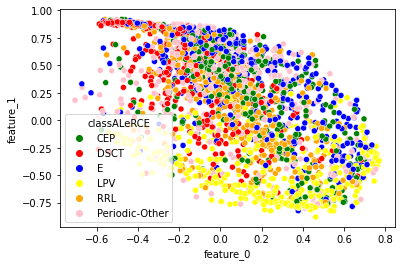

In [31]:
sns.scatterplot(x='feature_0',y='feature_1',data=finaldf, hue='classALeRCE', palette=['green','red','blue','yellow','orange','pink'])